# Task 5
**Performed by: Evgenii Kushakov, J4132C**

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data:**
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in **CNN_and_Transfer_Learning.ipynb** and fit neural networks for solving the binary classification task.

In [30]:
#Import tools
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import VGG16, ResNet50
from keras.optimizers import SGD
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

In [4]:
#Set using folders
train_folder = '/content/drive/MyDrive/Cats_and_Dogs/train'
val_folder = '/content/drive/MyDrive/Cats_and_Dogs/val'
test_folder = '/content/drive/MyDrive/Cats_and_Dogs/test'

#Set photo shape
w, h, channels = 150, 150, 3
photo_shape = (w, h, channels)

batch_size = 32

#Set number of photo samples
n_train_photos = 1000
n_val_photos = 2000
n_test_photos = 400

In [5]:
#Set image generator for each sample type
train_idg = ImageDataGenerator(rescale = 1. / 255)

train_gen = train_idg.flow_from_directory(
    train_folder,
    target_size = (w, h),
    batch_size = batch_size,
    class_mode = 'binary'
)

val_idg = ImageDataGenerator(rescale = 1. / 255)

val_gen = val_idg.flow_from_directory(
    val_folder,
    target_size = (w, h),
    batch_size = batch_size,
    class_mode = 'binary'
)

test_idg = ImageDataGenerator(rescale = 1. / 255)

test_gen = test_idg.flow_from_directory(
    test_folder,
    target_size = (w, h),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
#Set the network architecture
model = Sequential()

model.add(Conv2D(32, (4, 4), input_shape = photo_shape))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (4, 4)))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (4, 4)))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'SGD',
    metrics = ['accuracy']
)

In [ ]:
#Train the model

n_epochs = 16
n_train_batches = n_train_photos // batch_size
n_val_batches = n_val_photos // batch_size
model.fit(
    train_gen,
    steps_per_epoch = n_train_batches,
    epochs = n_epochs,
    validation_data = val_gen,
    validation_steps = n_val_batches
)

for i in range(n_epochs):
    for batch in range(n_train_batches):
        try:
            x_batch, y_batch = next(train_gen)
            model.train_on_batch(x_batch, y_batch)
        except StopIteration:
            break

Epoch 1/16
31/31 [==============================] - 200s 6s/step - loss: 0.6941 - accuracy: 0.5202 - val_loss: 0.6917 - val_accuracy: 0.5202
Epoch 2/16
31/31 [==============================] - 160s 5s/step - loss: 0.6946 - accuracy: 0.4929 - val_loss: 0.6893 - val_accuracy: 0.5232
Epoch 3/16
31/31 [==============================] - 156s 5s/step - loss: 0.6910 - accuracy: 0.5192 - val_loss: 0.6885 - val_accuracy: 0.5948
Epoch 4/16
31/31 [==============================] - 183s 6s/step - loss: 0.6909 - accuracy: 0.5202 - val_loss: 0.6875 - val_accuracy: 0.5746
Epoch 5/16
31/31 [==============================] - 142s 5s/step - loss: 0.6870 - accuracy: 0.5685 - val_loss: 0.6872 - val_accuracy: 0.5484
Epoch 6/16
31/31 [==============================] - 184s 6s/step - loss: 0.6803 - accuracy: 0.5615 - val_loss: 0.6850 - val_accuracy: 0.5857
Epoch 7/16
31/31 [==============================] - 173s 6s/step - loss: 0.6884 - accuracy: 0.5312 - val_loss: 0.6869 - val_accuracy: 0.5272
Epoch 8/16
31

In [ ]:
model_metrics = model.evaluate(
    test_gen,
    steps = len(test_gen) // batch_size
)
print(f'Test accuracy: {model_metrics[1] * 100}%')

2/2 [==============================] - 2s 787ms/step - loss: 0.6842 - accuracy: 0.5312
Test accuracy: 53.125%


Epoch 1/16
31/31 [==============================] - 167s 5s/step - loss: 0.6456 - accuracy: 0.6391 - val_loss: 0.6523 - val_accuracy: 0.5958
Epoch 2/16
31/31 [==============================] - 177s 6s/step - loss: 0.6487 - accuracy: 0.6381 - val_loss: 0.6416 - val_accuracy: 0.6305
Epoch 3/16
31/31 [==============================] - 176s 6s/step - loss: 0.6486 - accuracy: 0.6200 - val_loss: 0.6528 - val_accuracy: 0.6018
Epoch 4/16
31/31 [==============================] - 178s 6s/step - loss: 0.6519 - accuracy: 0.6179 - val_loss: 0.6495 - val_accuracy: 0.6104
Epoch 5/16
31/31 [==============================] - 138s 4s/step - loss: 0.6290 - accuracy: 0.6522 - val_loss: 0.6564 - val_accuracy: 0.5943
Epoch 6/16
31/31 [==============================] - 192s 6s/step - loss: 0.6406 - accuracy: 0.6381 - val_loss: 0.6329 - val_accuracy: 0.6356
Epoch 7/16
31/31 [==============================] - 132s 4s/step - loss: 0.6337 - accuracy: 0.6240 - val_loss: 0.6371 - val_accuracy: 0.6295
Epoch 8/16
31

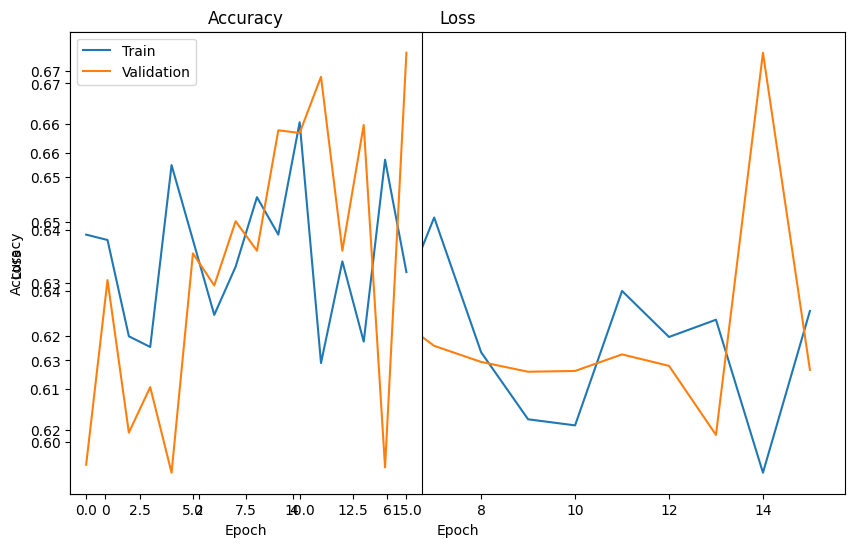

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch = n_train_photos // batch_size,
    epochs = n_epochs,
    validation_data = val_gen,
    validation_steps = n_val_photos // batch_size
)

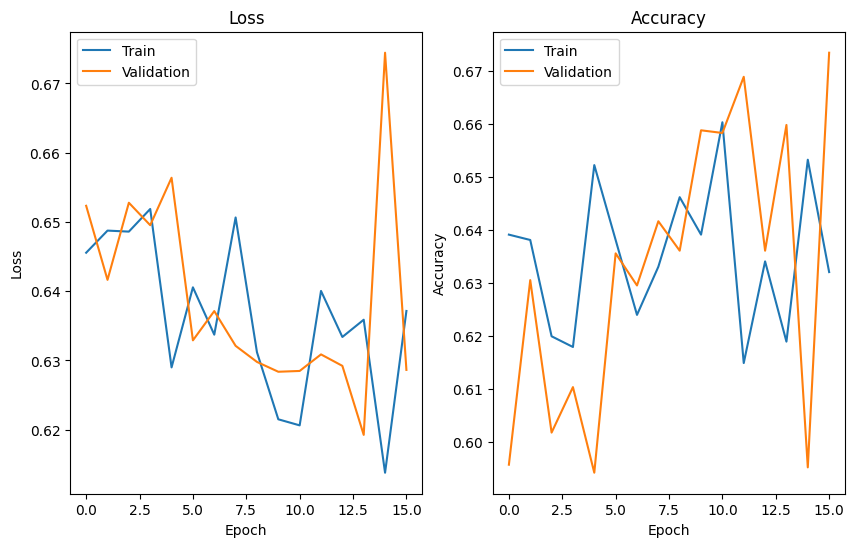

In [ ]:
fig = plt.figure(figsize=(10, 6))


ax_loss = fig.add_subplot(1, 2, 1)

ax_loss.plot(history.history['loss'], label = 'Train')
ax_loss.plot(history.history['val_loss'], label = 'Validation')

ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Loss')
ax_loss.legend()

ax_acc = fig.add_subplot(1, 2, 2)

ax_acc.plot(history.history['accuracy'], label = 'Train')
ax_acc.plot(history.history['val_accuracy'], label = 'Validation')

ax_acc.set_xlabel('Epoch')
ax_acc.set_ylabel('Accuracy')
ax_acc.set_title('Accuracy')
ax_acc.legend()

plt.show()

## Exercise 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with one more avaliable pre-trained deep learning model from keras application, for example Xception - https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

### VGG16

In [ ]:
vgg16 = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (w, h, channels)
)

vgg16.trainable = False

vgg16_model = Sequential()

vgg16_model.add(vgg16)

vgg16_model.add(Flatten())

vgg16_model.add(Dense(128))
vgg16_model.add(Activation('relu'))

vgg16_model.add(Dropout(0.5))

vgg16_model.add(Dense(1))
vgg16_model.add(Activation('sigmoid'))

vgg16_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'SGD',
    metrics = ['accuracy']
)

#Train the model

n_epochs = 8
n_train_batches = n_train_photos // batch_size
n_val_batches = n_val_photos // batch_size

vgg16_model_history = vgg16_model.fit(
    train_gen,
    steps_per_epoch = n_train_batches,
    epochs = n_epochs,
    validation_data = val_gen,
    validation_steps = n_val_batches
)

vgg16_metrics = vgg16_model.evaluate_generator(
    test_gen,
    steps = len(test_gen)
)
print(f'Test accuracy: {vgg16_metrics[1] * 100}%')

Epoch 1/8
31/31 [==============================] - 1031s 34s/step - loss: 0.7053 - accuracy: 0.6220 - val_loss: 0.5278 - val_accuracy: 0.8049
Epoch 2/8
31/31 [==============================] - 849s 28s/step - loss: 0.5900 - accuracy: 0.7006 - val_loss: 0.4923 - val_accuracy: 0.7964
Epoch 3/8
31/31 [==============================] - 851s 28s/step - loss: 0.4863 - accuracy: 0.7641 - val_loss: 0.4132 - val_accuracy: 0.8347
Epoch 4/8
31/31 [==============================] - 905s 30s/step - loss: 0.4921 - accuracy: 0.7631 - val_loss: 0.5327 - val_accuracy: 0.7087
Epoch 5/8
31/31 [==============================] - 853s 28s/step - loss: 0.4857 - accuracy: 0.7772 - val_loss: 0.3929 - val_accuracy: 0.8216
Epoch 6/8
31/31 [==============================] - 906s 30s/step - loss: 0.4344 - accuracy: 0.8004 - val_loss: 0.3646 - val_accuracy: 0.8453
Epoch 7/8
31/31 [==============================] - 919s 30s/step - loss: 0.4165 - accuracy: 0.8065 - val_loss: 0.3491 - val_accuracy: 0.8604
Epoch 8/8
31

<ipython-input-6-f1d1a754d6f2>:43: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  vgg16_metrics = vgg16_model.evaluate_generator(


Test accuracy: 85.39999723434448%


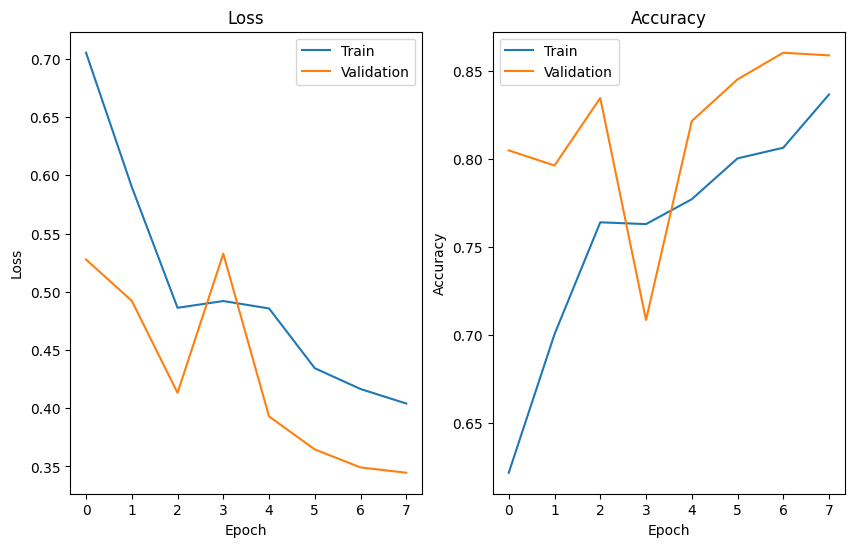

In [ ]:
fig = plt.figure(figsize=(10, 6))


ax_loss = fig.add_subplot(1, 2, 1)

ax_loss.plot(vgg16_model_history.history['loss'], label = 'Train')
ax_loss.plot(vgg16_model_history.history['val_loss'], label = 'Validation')

ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Loss')
ax_loss.legend()

ax_acc = fig.add_subplot(1, 2, 2)

ax_acc.plot(vgg16_model_history.history['accuracy'], label = 'Train')
ax_acc.plot(vgg16_model_history.history['val_accuracy'], label = 'Validation')

ax_acc.set_xlabel('Epoch')
ax_acc.set_ylabel('Accuracy')
ax_acc.set_title('Accuracy')
ax_acc.legend()

plt.show()

### ResNet50

In [6]:
res_net_50 = ResNet50(
    weights = 'imagenet',
    include_top = False,
    input_shape = (w, h, channels)
)

res_net_50.trainable = False

res_net_50_model = Sequential()

res_net_50_model.add(res_net_50)

res_net_50_model.add(Flatten())

res_net_50_model.add(Dense(256))
res_net_50_model.add(Activation('relu'))

res_net_50_model.add(Dropout(0.5))

res_net_50_model.add(Dense(1))
res_net_50_model.add(Activation('sigmoid'))

res_net_50_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

#Train the model

n_epochs = 8
n_train_batches = 25
n_val_batches = 25

res_net_50_model_history = res_net_50_model.fit(
    train_gen,
    steps_per_epoch = n_train_batches,
    epochs = n_epochs,
    validation_data = val_gen,
    validation_steps = n_val_batches
)

res_net_50_model_metrics = res_net_50_model.evaluate_generator(
    test_gen,
    steps = len(test_gen)
)
print(f'Test accuracy: {res_net_50_model_metrics[1] * 100}%')

Epoch 1/8
25/25 [==============================] - 297s 12s/step - loss: 1.7401 - accuracy: 0.4812 - val_loss: 0.6826 - val_accuracy: 0.5437
Epoch 2/8
25/25 [==============================] - 155s 6s/step - loss: 0.6983 - accuracy: 0.5163 - val_loss: 0.6901 - val_accuracy: 0.5125
Epoch 3/8
25/25 [==============================] - 162s 7s/step - loss: 0.6920 - accuracy: 0.5263 - val_loss: 0.6832 - val_accuracy: 0.5337
Epoch 4/8
25/25 [==============================] - 154s 6s/step - loss: 0.6959 - accuracy: 0.5337 - val_loss: 0.6925 - val_accuracy: 0.4863
Epoch 5/8
25/25 [==============================] - 156s 6s/step - loss: 0.7077 - accuracy: 0.5100 - val_loss: 0.6811 - val_accuracy: 0.5188
Epoch 6/8
25/25 [==============================] - 156s 6s/step - loss: 0.6877 - accuracy: 0.5200 - val_loss: 0.6828 - val_accuracy: 0.5412
Epoch 7/8
25/25 [==============================] - 154s 6s/step - loss: 0.6870 - accuracy: 0.5437 - val_loss: 0.6873 - val_accuracy: 0.5312
Epoch 8/8
25/25 [==

<ipython-input-6-9834b0481aed>:43: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  res_net_50_model_metrics = res_net_50_model.evaluate_generator(


Test accuracy: 56.40000104904175%


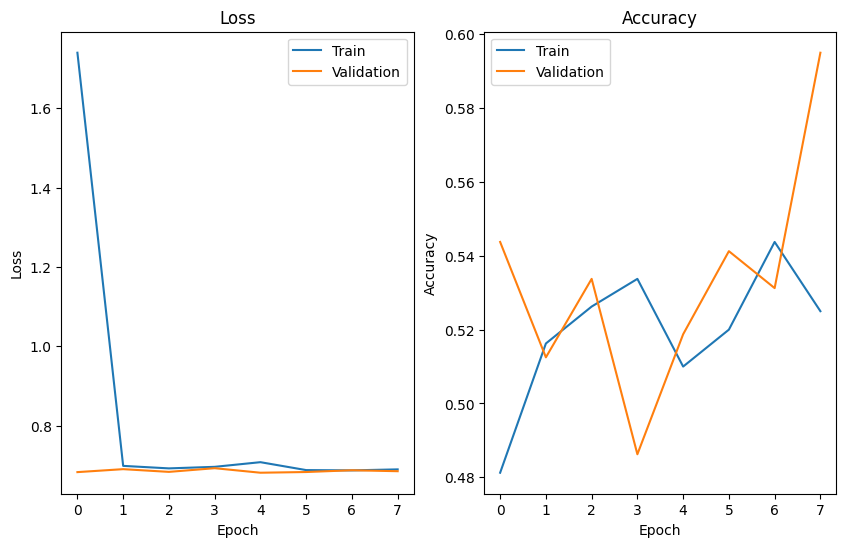

In [7]:
fig = plt.figure(figsize=(10, 6))


ax_loss = fig.add_subplot(1, 2, 1)

ax_loss.plot(res_net_50_model_history.history['loss'], label = 'Train')
ax_loss.plot(res_net_50_model_history.history['val_loss'], label = 'Validation')

ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.set_title('Loss')
ax_loss.legend()

ax_acc = fig.add_subplot(1, 2, 2)

ax_acc.plot(res_net_50_model_history.history['accuracy'], label = 'Train')
ax_acc.plot(res_net_50_model_history.history['val_accuracy'], label = 'Validation')

ax_acc.set_xlabel('Epoch')
ax_acc.set_ylabel('Accuracy')
ax_acc.set_title('Accuracy')
ax_acc.legend()

plt.show()

### Inference of the best algorithm

In [31]:
def inference(path, model, class_names):
    check_image = image.load_img(
        path,
        target_size = (w, h)
    )
    check_image = image.img_to_array(check_image)
    check_image = np.expand_dims(check_image, axis = 0)
    check_image = check_image / 255.0
    pred = model.predict(check_image)
    pred_class = class_names[int(round(pred[0][0]))]
    return pred_class

image_path = '/content/drive/MyDrive/Cats_and_Dogs/OIP.jpg'
model = res_net_50_model
class_names = ['cat', 'dog']

pred_class = inference(image_path, model, class_names)
print(f'Predicted class by model {model} is {pred_class}')

1/1 [==============================] - 0s 232ms/step
Predicted class by model <keras.src.engine.sequential.Sequential object at 0x7b81c1207f40> is dog


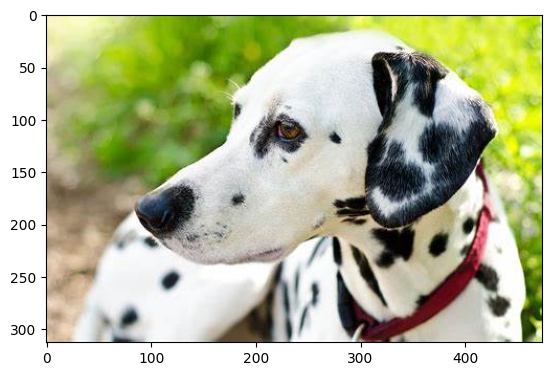

In [36]:
custom_image = Image.open(image_path)
plt.imshow(custom_image)